In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Cargar los datos desde el archivo Excel


Amazon_data = pd.read_excel('Amazon.xlsx')
Amazon_data.head()

,Unnamed: 0,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,Adam,205,3,345,235,24,23,26,21,17
1,Anna,9,15,315,33,25,4,42,215,28
2,Bernard,17,26,285,3,43,27,41,26,33
3,Edward,135,5,355,295,18,23,39,195,17
4,Emilia,3,45,48,39,34,46,225,34,43


In [22]:
print (Amazon_data.shape)

# Convertir en un DataFrame

Amazon_df = pd.DataFrame(Amazon_data, columns=['Velocidad Entrega', 'Precio', 'Durabilidad', 'Imagen Producto', 'Valor Educativo', 'Servicio Retorno', 'Tamano Paquete', 'Calidad Producto', 'Numero Estrellas'])
Amazon_df.head()

(100, 10)


,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,205,3,345,235,24,23,26,21,17
1,9,15,315,33,25,4,42,215,28
2,17,26,285,3,43,27,41,26,33
3,135,5,355,295,18,23,39,195,17
4,3,45,48,39,34,46,225,34,43


In [23]:
# Crear un DataFrame con los nombres de los clientes y cambiando el nombre de la columna a Cliente

Amazon_Nombres_df = pd.DataFrame(Amazon_data, columns=['Unnamed: 0'])
Amazon_Nombres_df.columns = ['Clientes']
Amazon_Nombres_df.head()

,Clientes
0,Adam
1,Anna
2,Bernard
3,Edward
4,Emilia


In [24]:
from sklearn.preprocessing import normalize


# Normalizar los datos
Columnas_normalized = normalize(Amazon_df, axis=0)
Columnas_normalized = pd.DataFrame(Columnas_normalized, columns=Amazon_df.columns)

# Mostrar las primeras filas del DataFrame normalizado
Columnas_normalized.head()



,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas
0,0.156023,0.003444,0.113932,0.124941,0.085964,0.089450,0.011531,0.012372,0.055675
1,0.006850,0.017219,0.104025,0.017545,0.089545,0.015557,0.018626,0.126670,0.091699
2,0.012939,0.029846,0.094118,0.001595,0.154018,0.105007,0.018183,0.015318,0.108074
3,0.102747,0.005740,0.117234,0.156841,0.064473,0.089450,0.017296,0.114887,0.055675
4,0.002283,0.051657,0.015851,0.020735,0.121782,0.178900,0.099783,0.020032,0.140824


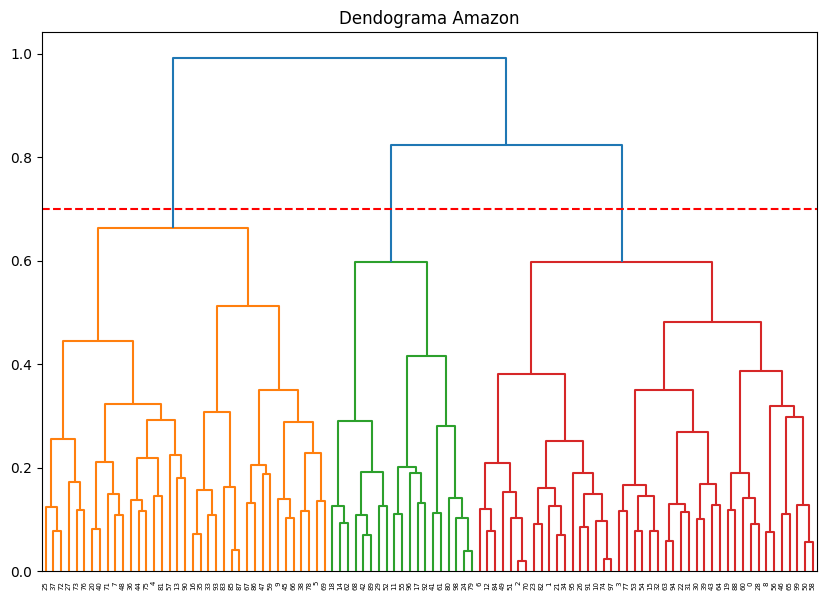

In [25]:
# Creacion del dendograma de Amazon

import scipy.cluster.hierarchy as shc

# Formato de los datos

plt.figure(figsize=(10, 7))
plt.title("Dendograma Amazon")
dend = shc.dendrogram(shc.linkage(Columnas_normalized, method='ward'))
plt.axhline(y=0.7, color='r', linestyle='--')


In [26]:
# localizacion de los clusters optimos

color_list = dend['color_list']
unique_colors = set(color_list)

num_clusters = len(unique_colors) -1
print("Numero de clusters optimos: ", num_clusters)

Numero de clusters optimos:  3


[1 1 1 1 0 0 1 0 1 0 1 2 1 0 2 1 0 2 2 1 0 1 1 1 2 0 1 0 1 2 1 1 1 0 1 0 0
 0 0 1 0 2 2 1 0 0 1 0 0 1 1 1 2 1 1 2 1 0 1 0 1 2 2 1 1 1 0 0 2 0 1 0 0 0
 1 0 0 1 0 2 2 0 1 0 1 0 0 0 1 2 0 1 2 0 1 1 2 1 2 1]


Text(0.5, 1.0, 'Clusters Calidad de Producto vs Numero de Estrellas')

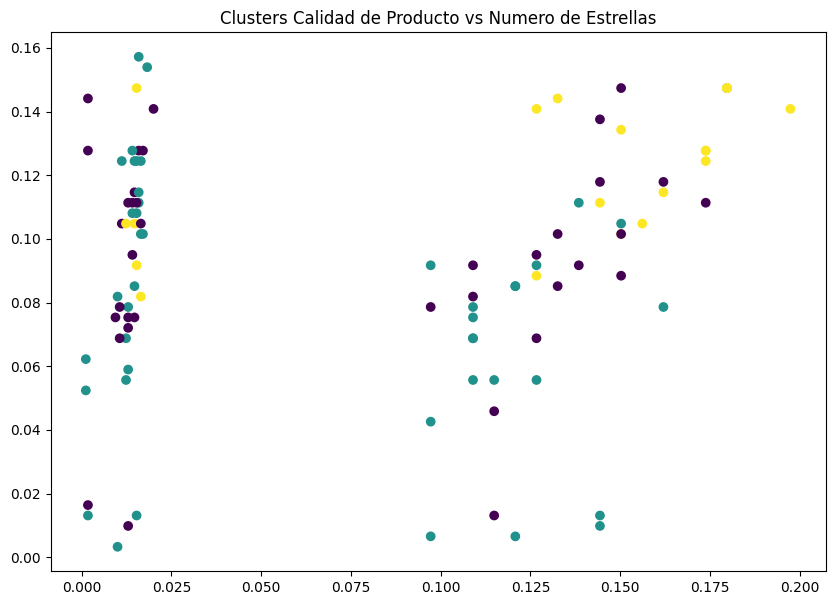

In [27]:
# generar grupos y anexarlos al DataFrame original

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
grupos = cluster.fit_predict(Columnas_normalized)
print(grupos)

plt.figure(figsize=(10, 7))
plt.scatter(Columnas_normalized['Calidad Producto'], Columnas_normalized['Numero Estrellas'], c=cluster.labels_, cmap='viridis')
plt.title('Clusters Calidad de Producto vs Numero de Estrellas')

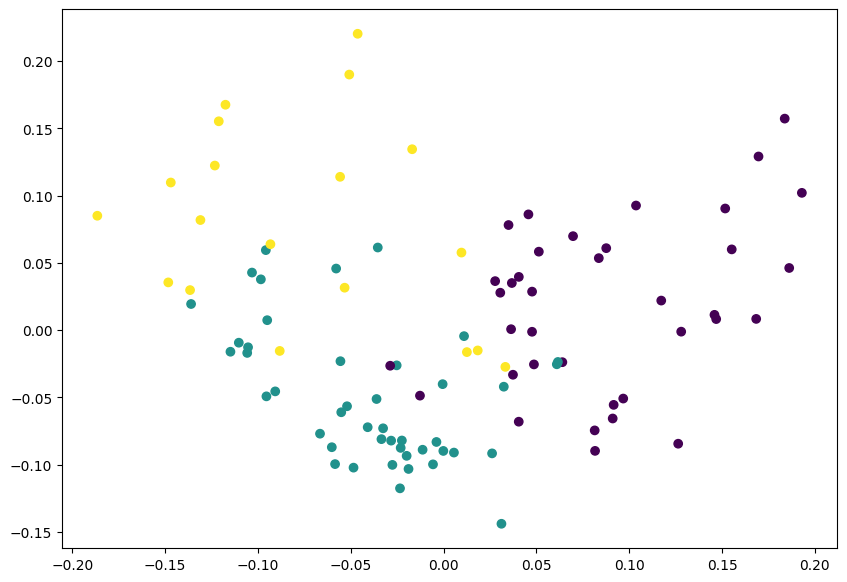

In [28]:
# Separacion de los grupos por PCA
campos = Columnas_normalized.values
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(campos)
campos = pca.transform(campos)

plt.figure(figsize=(10, 7))
plt.scatter(campos[:,0], campos[:,1], c=cluster.labels_, cmap='viridis')

In [29]:
dataframe = pd.DataFrame(grupos, columns=['Grupo'])
dataframe

,Grupo
0,1
1,1
2,1
3,1
4,0
...,...
95,1
96,2
97,1
98,2


In [30]:
# Unir los dos DataFrames
dataframe2 = pd.concat([Amazon_Nombres_df, Amazon_df, dataframe], axis=1, join='inner')
dataframe2

,Clientes,Velocidad Entrega,Precio,Durabilidad,Imagen Producto,Valor Educativo,Servicio Retorno,Tamano Paquete,Calidad Producto,Numero Estrellas,Grupo
0,Adam,205,3,345,235,24,23,26,21,17,1
1,Anna,9,15,315,33,25,4,42,215,28,1
2,Bernard,17,26,285,3,43,27,41,26,33,1
3,Edward,135,5,355,295,18,23,39,195,17,1
4,Emilia,3,45,48,39,34,46,225,34,43,0
...,...,...,...,...,...,...,...,...,...,...,...
95,Teofan,3,8,32,25,7,21,42,17,1,1
96,Teofil,305,25,46,24,33,28,355,26,45,2
97,Teofila,1,14,26,25,24,27,42,185,23,1
98,Teon,155,11,335,34,26,29,42,215,27,2


## Entrenando con el nuevo DataFrame

In [31]:
# Cargando nuevas librerias para ejecutar el modelo de clasificacion

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity

In [32]:
X = dataframe2[['Velocidad Entrega', 'Precio', 'Durabilidad', 'Imagen Producto', 'Valor Educativo', 'Servicio Retorno', 'Tamano Paquete', 'Calidad Producto', 'Numero Estrellas']]
y = dataframe2['Grupo']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [34]:
gbt = GradientBoostingClassifier(n_estimators=100, random_state=1)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [35]:
print('F1Score de prueba.. ',gbt.score(X_test, y_test))
print('F1Score de entrenamiento.. ',gbt.score(X_train, y_train))

F1Score de prueba..  0.9
F1Score de entrenamiento..  1.0


In [36]:
y_pred = gbt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89        12
           2       1.00      0.62      0.77         8

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.92      0.90      0.89        30



In [ ]:
clientes = ['Salome', 'Stephania', 'Lydia']
predicciones = {}

# Obtener datos y realizar predicciones para cada cliente
for cliente in clientes:
    cliente_data = dataframe2.loc[dataframe2['Clientes'] == cliente]
    cliente_data = cliente_data[['Velocidad Entrega', 'Precio', 'Durabilidad', 'Imagen Producto', 'Valor Educativo', 'Servicio Retorno', 'Tamano Paquete', 'Calidad Producto', 'Numero Estrellas']]
    
    if not cliente_data.empty:
        predicciones[cliente] = gbt.predict(cliente_data)[0]
    else:
        predicciones[cliente] = 'No se encontraron datos'

# Imprimir recomendaciones para cada cliente
for cliente, prediccion in predicciones.items():
    if isinstance(prediccion, str):
        print(f'No se encontraron datos para el cliente {cliente}')
    else:
        cliente_grupo = dataframe2.loc[dataframe2['Grupo'] == prediccion].sample()
        cliente_grupo_nombre = cliente_grupo['Clientes'].values[0]
        print(f'Se Recomendaría a {cliente} los mismos productos que compró {cliente_grupo_nombre} ya que pertenecen al grupo {prediccion}')


Se Recomendaría a Salome los mismos productos que compró Monica ya que pertenecen al grupo 0
Se Recomendaría a Stephania los mismos productos que compró Helen ya que pertenecen al grupo 2
Se Recomendaría a Lydia los mismos productos que compró Stephan ya que pertenecen al grupo 1
